In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#=================DATA CLEANING=================#

In [33]:

df = pd.read_csv("Fishers maket.csv")


In [34]:
df.info()  # it will Show dataset structure



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [35]:
df.head()  # it will Show first few rows

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [36]:
df = df.drop_duplicates()


In [37]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [38]:
df.isnull().sum()  # Show missing values count per column



Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [39]:
df = df.dropna()  # Remove rows with missing values

In [40]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [41]:
#==============DATA MANUPULATION===========

In [42]:
# Convert categorical column "Species" to numeric encoding
df['Species'] = df['Species'].astype('category').cat.codes

In [43]:
# Add a new feature - Fish BMI (Body Mass Index)
df['Fish_BMI'] = df['Weight'] / (df['Length3'] * df['Width'])

In [44]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Fish_BMI
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200,2.006633
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056,2.158787
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961,2.327990
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555,2.432010
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340,2.463393


In [45]:
#==================DATA VISUALISATION=================


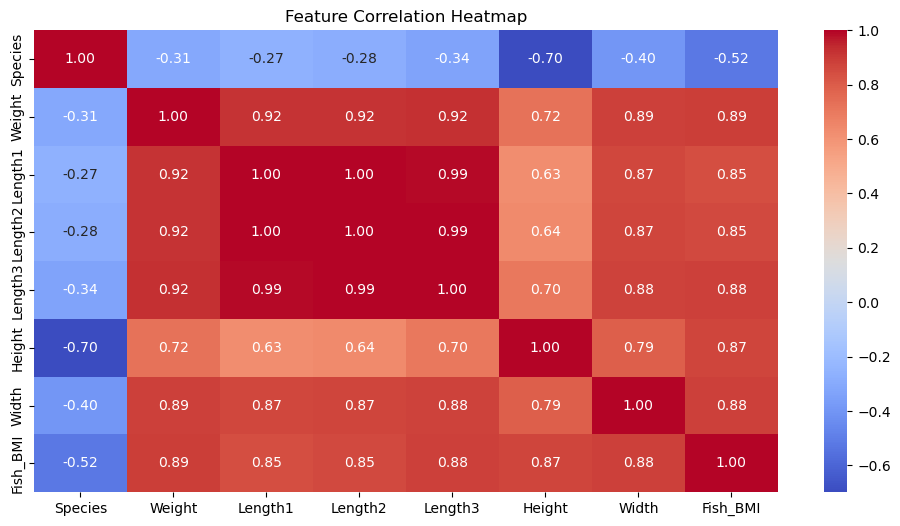

In [46]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

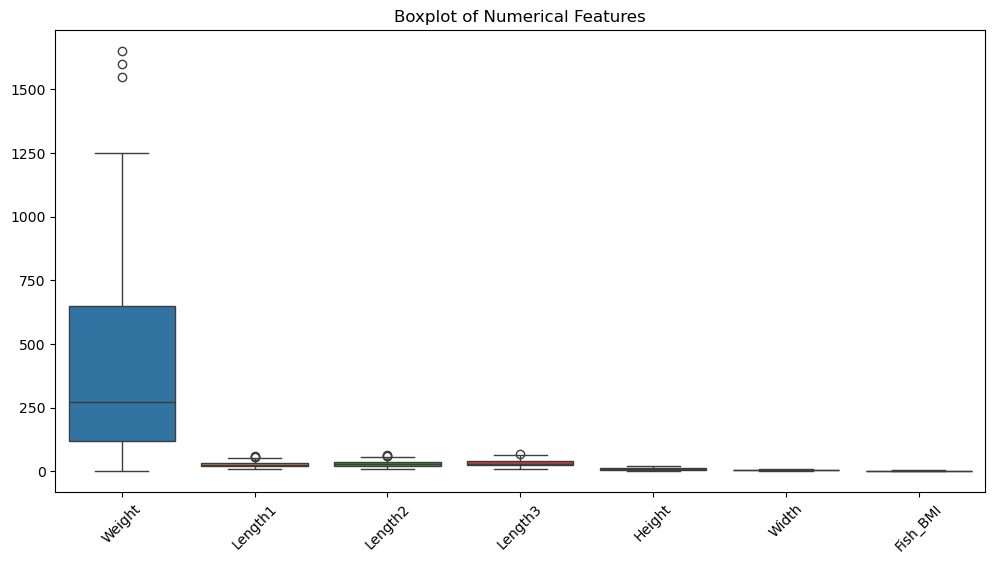

In [47]:
# Boxplot for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['Species']))
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

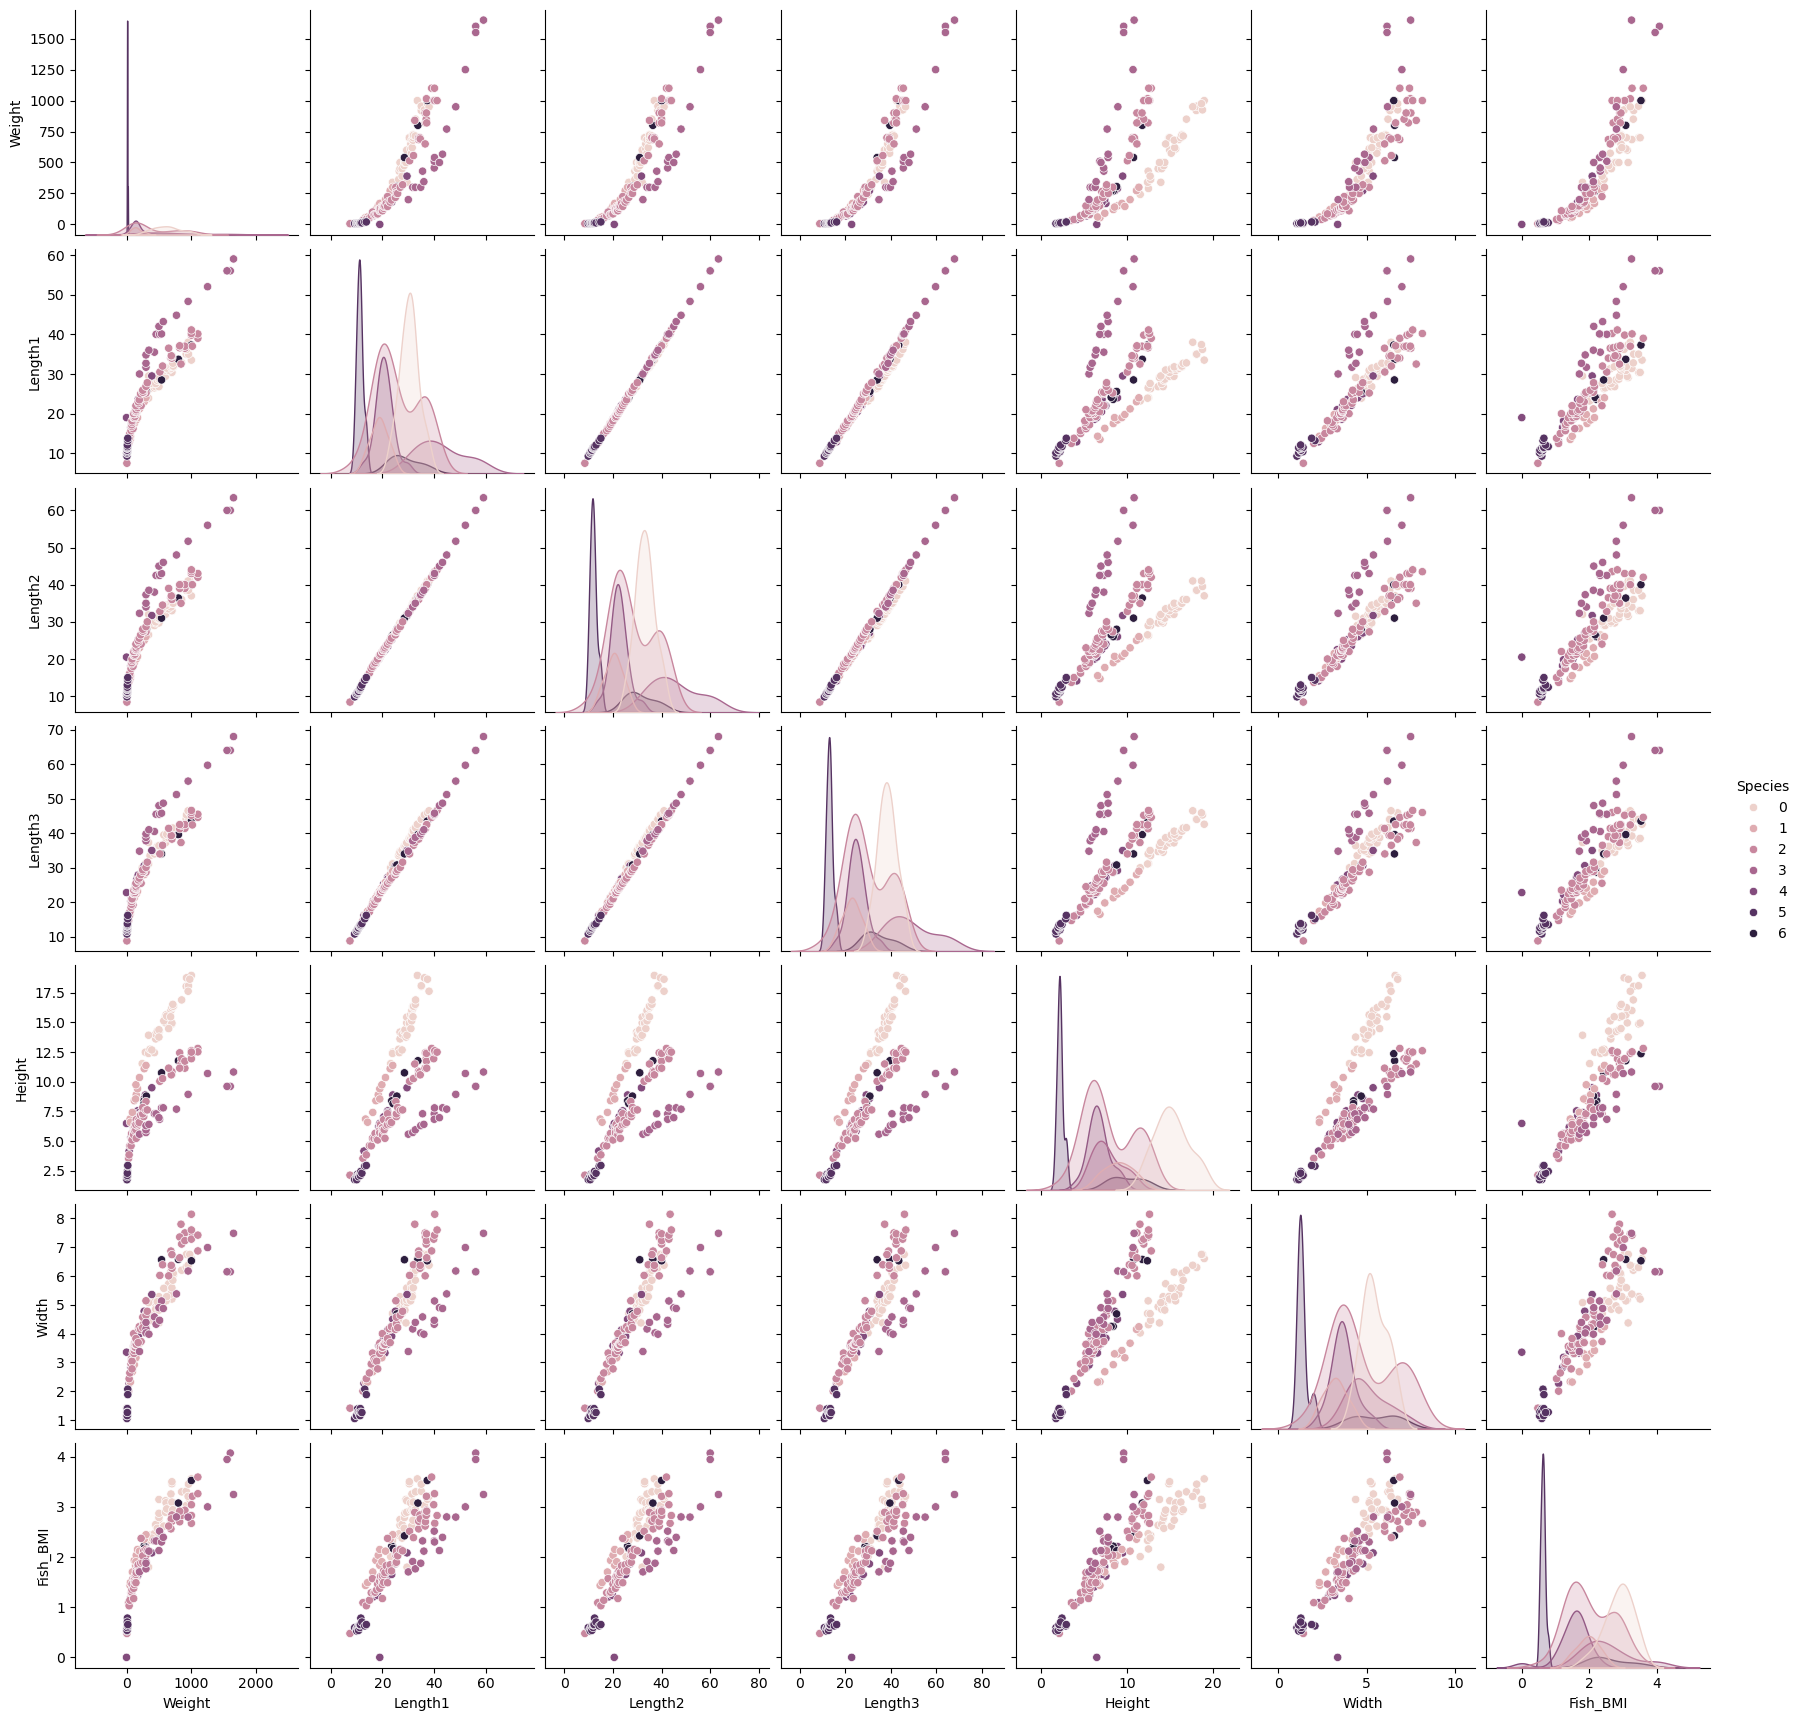

In [50]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='Species', diag_kind='kde')
plt.show()


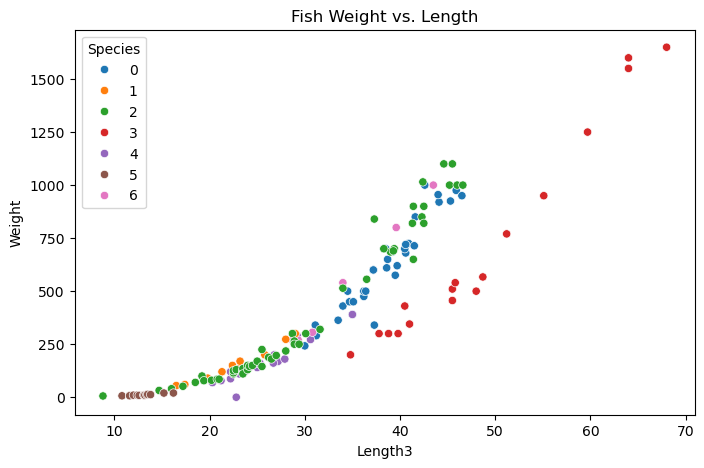

In [51]:
#scatter plot for weight vs length
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Length3', y='Weight', hue='Species', data=df, palette='tab10')
plt.title("Fish Weight vs. Length")
plt.xlabel("Length3")
plt.ylabel("Weight")
plt.legend(title="Species")
plt.show()


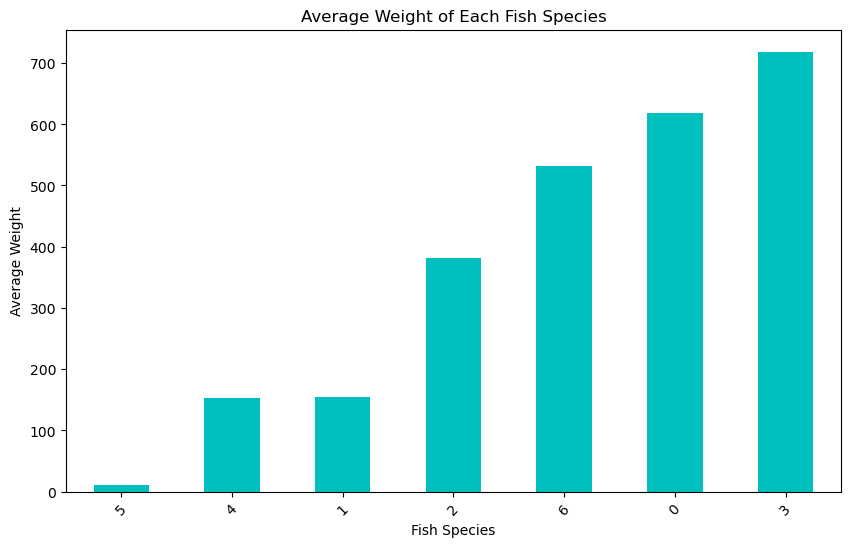

In [52]:
plt.figure(figsize=(10, 6))
df.groupby('Species')['Weight'].mean().sort_values().plot(kind='bar', color='c')
plt.title("Average Weight of Each Fish Species")
plt.xlabel("Fish Species")
plt.ylabel("Average Weight")
plt.xticks(rotation=45)
plt.show()
